In [1]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper
import math
import time
start_time = time.time()



Welcome to JupyROOT 6.24/08


In [2]:
filename = "../output.root"
file = TFile(filename)
tree = file.Get("nominal")
print(tree.GetEntries())

258576


In [3]:
# hists
# 1. m_ttbar
m_ttbars = []
m_ttbar_Yt0  = TH1D ("m_ttbar_Yt0","m_ttbar_Yt0" ,20 ,300 ,850)
m_ttbar_Yt1  = TH1D ("m_ttbar_Yt1","m_ttbar_Yt1" ,20 ,300 ,850)
m_ttbar_Yt2  = TH1D ("m_ttbar_Yt2","m_ttbar_Yt2" ,20 ,300 ,850)
m_ttbar_Yt3  = TH1D ("m_ttbar_Yt3","m_ttbar_Yt3" ,20 ,300 ,850)
m_ttbar_Yt4  = TH1D ("m_ttbar_Yt4","m_ttbar_Yt4" ,20 ,300 ,850)
m_ttbars = [m_ttbar_Yt0, m_ttbar_Yt1, m_ttbar_Yt2, m_ttbar_Yt3, m_ttbar_Yt4]



# 2. m_bl_minimax
m_bl_Yt0  = TH1D ("m_bl_Yt0", "masses of reco level minimax", 20, 0, 300)
m_bl_Yt1  = TH1D ("m_bl_Yt1", "masses of reco level minimax", 20, 0, 300)
m_bl_Yt2  = TH1D ("m_bl_Yt2", "masses of reco level minimax", 20, 0, 300)
m_bl_Yt3  = TH1D ("m_bl_Yt3", "masses of reco level minimax", 20, 0, 300)
m_bl_Yt4  = TH1D ("m_bl_Yt4", "masses of reco level minimax", 20, 0, 300)
m_bls = [m_bl_Yt0, m_bl_Yt1, m_bl_Yt2, m_bl_Yt3, m_bl_Yt4]


In [4]:
for n in range(250000):
     
     tree.GetEntry(n)
     yt_weights = [getattr(tree, "t_yt_reweight0"), getattr(tree, "t_yt_reweight1"), getattr(tree, "t_yt_reweight2") , getattr(tree, "t_yt_reweight3"), getattr(tree, "t_yt_reweight4")]
     
     m_ttbar = getattr(tree, "MC_ttbar_beforeFSR_m")/1000
     p4s_lep = helper.GetLorenzP4List(tree, 'lep')
     p4s_bjet = helper.GetLorenzP4List(tree,'bjet')
     ## minimax
     if len(p4s_lep) !=2 or len(p4s_bjet) != 2: continue
     idx_l, idx_b = helper.minimax_cross(p4s_lep, p4s_bjet)
     bl_minimax = [p4s_lep[idx_l] + p4s_bjet[idx_b], p4s_lep[1 - idx_l] + p4s_bjet[1 - idx_b]]
     for i in range(5):
          m_ttbars[i].Fill(m_ttbar, yt_weights[i])
          for j in [0, 1]:
               m_bls[i].Fill(bl_minimax[j].M()/1000, yt_weights[i])

         

     if (not(n % 50000)): 
        print("event:", n, "--- %.2f seconds ---" % (time.time() - start_time))

     

   



event: 0 --- 0.46 seconds ---
event: 50000 --- 13.70 seconds ---
event: 100000 --- 27.26 seconds ---
event: 150000 --- 40.46 seconds ---
event: 200000 --- 54.03 seconds ---


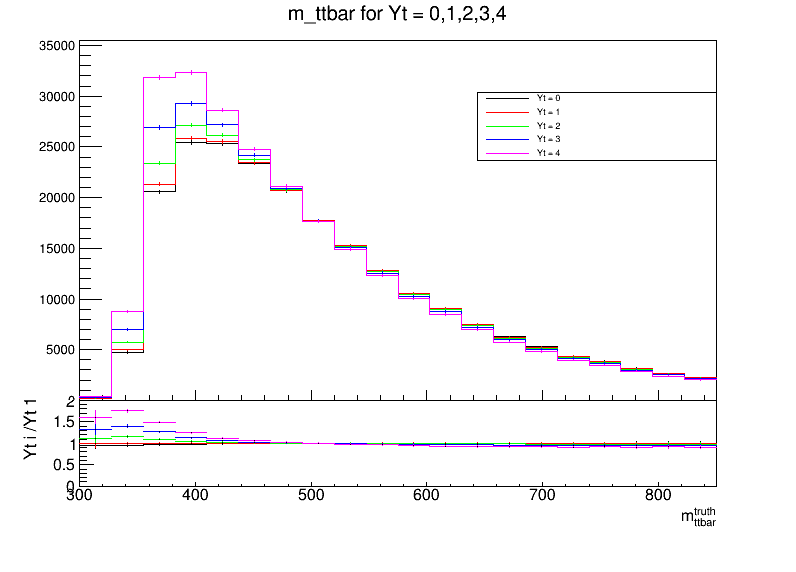

In [5]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.Draw()
pad1.cd()
m_ttbars[0].SetTitle("m_ttbar for Yt = 0,1,2,3,4")
m_ttbars[0].Draw()
m_ttbars[0].GetYaxis().SetRangeUser(0, m_ttbars[4].GetMaximum()*1.1)
leg = TLegend(0.6,0.6,0.9,0.77)
colors = [1, 2, 3, 4, 6]
for i, color in enumerate(colors):
    m_ttbars[i].SetLineColor(color)
    m_ttbars[i].Draw("same h")
    leg.AddEntry(m_ttbars[i],"Yt = "+ str(i), "l")

leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
gStyle.SetOptStat(0)

ratios = []

for i in range(5):
    ratios.append(m_ttbars[i].Clone("ratio"+str(i)))
for i, ratio in enumerate(ratios): 
    ratio.SetStats(False)
    ratio.SetTitle("")
    ratio.GetXaxis().SetLabelOffset(0.005)
    ratio.GetXaxis().SetLabelSize(0.12)
    ratio.GetXaxis().SetTitleOffset(1.1)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetLabelSize(0.12)
    ratio.GetYaxis().SetTitleSize(0.13)
    ratio.GetYaxis().SetTitle("Yt i /Yt 1")
    ratio.GetYaxis().SetTitleOffset(0.3)
    ratio.GetYaxis().SetNdivisions(506)
    # ratio.Draw("pe")
    ratio.GetYaxis().SetRangeUser(0, 2)
    ratio.GetXaxis().SetTitle("m_{ttbar}^{truth}")
    ratio.Divide(m_ttbars[1])
    ratio.Draw("same")

# ref = theta_bl_truth.Clone("ref")
# ref.Divide(theta_bl_truth)
# ref.Draw("same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


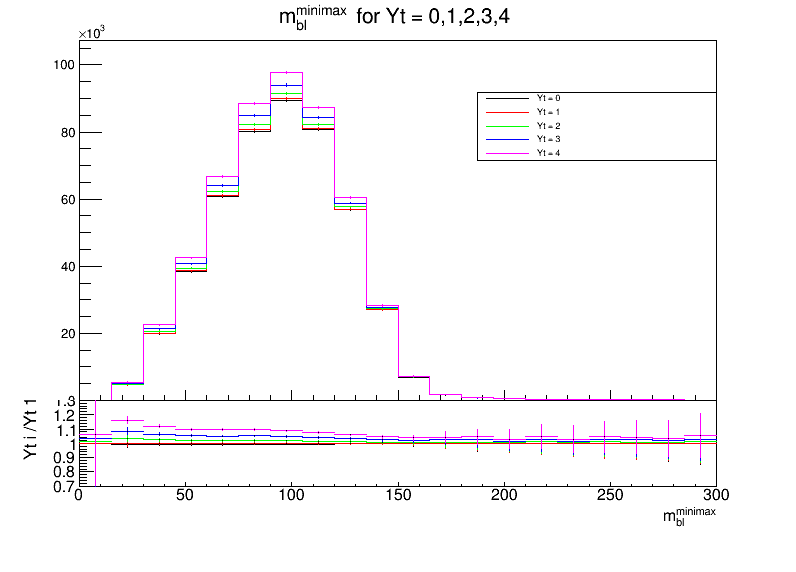

In [6]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.Draw()
pad1.cd()
m_bls[0].SetTitle("m_{bl}^{minimax} for Yt = 0,1,2,3,4")
m_bls[0].Draw()
m_bls[0].GetYaxis().SetRangeUser(0, m_bls[4].GetMaximum()*1.1)
leg = TLegend(0.6,0.6,0.9,0.77)
colors = [1, 2, 3, 4, 6]
for i, color in enumerate(colors):
    m_bls[i].SetLineColor(color)
    m_bls[i].Draw("same h")
    leg.AddEntry(m_bls[i],"Yt = "+ str(i), "l")

leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
gStyle.SetOptStat(0)

ratios = []

for i in range(5):
    ratios.append(m_bls[i].Clone("ratio"+str(i)))
for i, ratio in enumerate(ratios): 
    ratio.SetStats(False)
    ratio.SetTitle("")
    ratio.GetXaxis().SetLabelOffset(0.005)
    ratio.GetXaxis().SetLabelSize(0.12)
    ratio.GetXaxis().SetTitleOffset(1.1)
    ratio.GetXaxis().SetTitleSize(0.12)
    ratio.GetYaxis().SetLabelSize(0.12)
    ratio.GetYaxis().SetTitleSize(0.13)
    ratio.GetYaxis().SetTitle("Yt i /Yt 1")
    ratio.GetYaxis().SetTitleOffset(0.3)
    ratio.GetYaxis().SetNdivisions(506)
    # ratio.Draw("pe")
    ratio.GetYaxis().SetRangeUser(0.7, 1.3)
    ratio.GetXaxis().SetTitle("m_{bl}^{minimax}")
    ratio.Divide(m_bls[1])
    ratio.Draw("same")

# ref = theta_bl_truth.Clone("ref")
# ref.Divide(theta_bl_truth)
# ref.Draw("same")
c.Draw()